Loading the dataset

In [2]:
import pandas as pd
df=pd.read_csv("weather_classification_data.csv")


Exploring dataset

In [3]:
df.head(5)

,Temperature,Humidity,Wind Speed,Precipitation (%),Cloud Cover,Atmospheric Pressure,UV Index,Season,Visibility (km),Location,Weather Type
0,14.0,73,9.5,82.0,partly cloudy,1010.82,2,Winter,3.5,inland,Rainy
1,39.0,96,8.5,71.0,partly cloudy,1011.43,7,Spring,10.0,inland,Cloudy
2,30.0,64,7.0,16.0,clear,1018.72,5,Spring,5.5,mountain,Sunny
3,38.0,83,1.5,82.0,clear,1026.25,7,Spring,1.0,coastal,Sunny
4,27.0,74,17.0,66.0,overcast,990.67,1,Winter,2.5,mountain,Rainy


In [4]:
print(df.isnull().sum())

Temperature             0
Humidity                0
Wind Speed              0
Precipitation (%)       0
Cloud Cover             0
Atmospheric Pressure    0
UV Index                0
Season                  0
Visibility (km)         0
Location                0
Weather Type            0
dtype: int64


Preprocessing the dataset

In [5]:
target_var = 'Weather Type'  

# Identifying categorical variables excluding the target variable
categorical_vars = df.select_dtypes(include=['object', 'category']).columns
categorical_vars = categorical_vars[categorical_vars != target_var]  # Exclude target variable from one-hot encoding

# Converting categorical variables to numerical variables using one-hot encoding
df_encoded = pd.get_dummies(df, columns=categorical_vars, drop_first=True)


In [6]:
boolean_cols = df_encoded.select_dtypes(include='bool').columns
df_encoded[boolean_cols] = df_encoded[boolean_cols].astype(int)




In [7]:
print("\nDataFrame after encoding categorical variables:")
df_encoded.head(5)


DataFrame after encoding categorical variables:


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,14.0,73,9.5,82.0,1010.82,2,3.5,Rainy,0,0,1,0,0,1,1,0
1,39.0,96,8.5,71.0,1011.43,7,10.0,Cloudy,0,0,1,1,0,0,1,0
2,30.0,64,7.0,16.0,1018.72,5,5.5,Sunny,0,0,0,1,0,0,0,1
3,38.0,83,1.5,82.0,1026.25,7,1.0,Sunny,0,0,0,1,0,0,0,0
4,27.0,74,17.0,66.0,990.67,1,2.5,Rainy,0,1,0,0,0,1,0,1


Normaliztaion and Standardization 

In [8]:
from sklearn.preprocessing import MinMaxScaler

# Initializing the scaler
scaler = MinMaxScaler()

# Identifing numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Appling the scaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

df_encoded.head(5)


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,0.291045,0.595506,0.195876,0.752294,0.527951,0.142857,0.175,Rainy,0,0,1,0,0,1,1,0
1,0.477612,0.853933,0.175258,0.651376,0.529480,0.500000,0.500,Cloudy,0,0,1,1,0,0,1,0
2,0.410448,0.494382,0.144330,0.146789,0.547746,0.357143,0.275,Sunny,0,0,0,1,0,0,0,1
3,0.470149,0.707865,0.030928,0.752294,0.566614,0.500000,0.050,Sunny,0,0,0,1,0,0,0,0
4,0.388060,0.606742,0.350515,0.605505,0.477461,0.071429,0.125,Rainy,0,1,0,0,0,1,0,1


In [9]:
from sklearn.preprocessing import StandardScaler

# Initialize the scaler
scaler = StandardScaler()

# Identify numerical columns
numerical_cols = df_encoded.select_dtypes(include=['int64', 'float64']).columns

# Apply the scaler to the numerical columns
df_encoded[numerical_cols] = scaler.fit_transform(df_encoded[numerical_cols])

# Check the result
df_encoded.head()


,Temperature,Humidity,Wind Speed,Precipitation (%),Atmospheric Pressure,UV Index,Visibility (km),Weather Type,Cloud Cover_cloudy,Cloud Cover_overcast,Cloud Cover_partly cloudy,Season_Spring,Season_Summer,Season_Winter,Location_inland,Location_mountain
0,-0.294931,0.212404,-0.048086,0.887629,0.134203,-0.520104,-0.582231,Rainy,0,0,1,0,0,1,1,0
1,1.143035,1.351385,-0.192836,0.543291,0.150602,0.776424,1.345768,Cloudy,0,0,1,1,0,0,1,0
2,0.625367,-0.233285,-0.409962,-1.178401,0.346579,0.257813,0.010999,Sunny,0,0,0,1,0,0,0,1
3,1.085516,0.707613,-1.206089,0.887629,0.549008,0.776424,-1.323769,Sunny,0,0,0,1,0,0,0,0
4,0.452811,0.261924,1.037543,0.386773,-0.407490,-0.779410,-0.878846,Rainy,0,1,0,0,0,1,0,1


Data visualization 

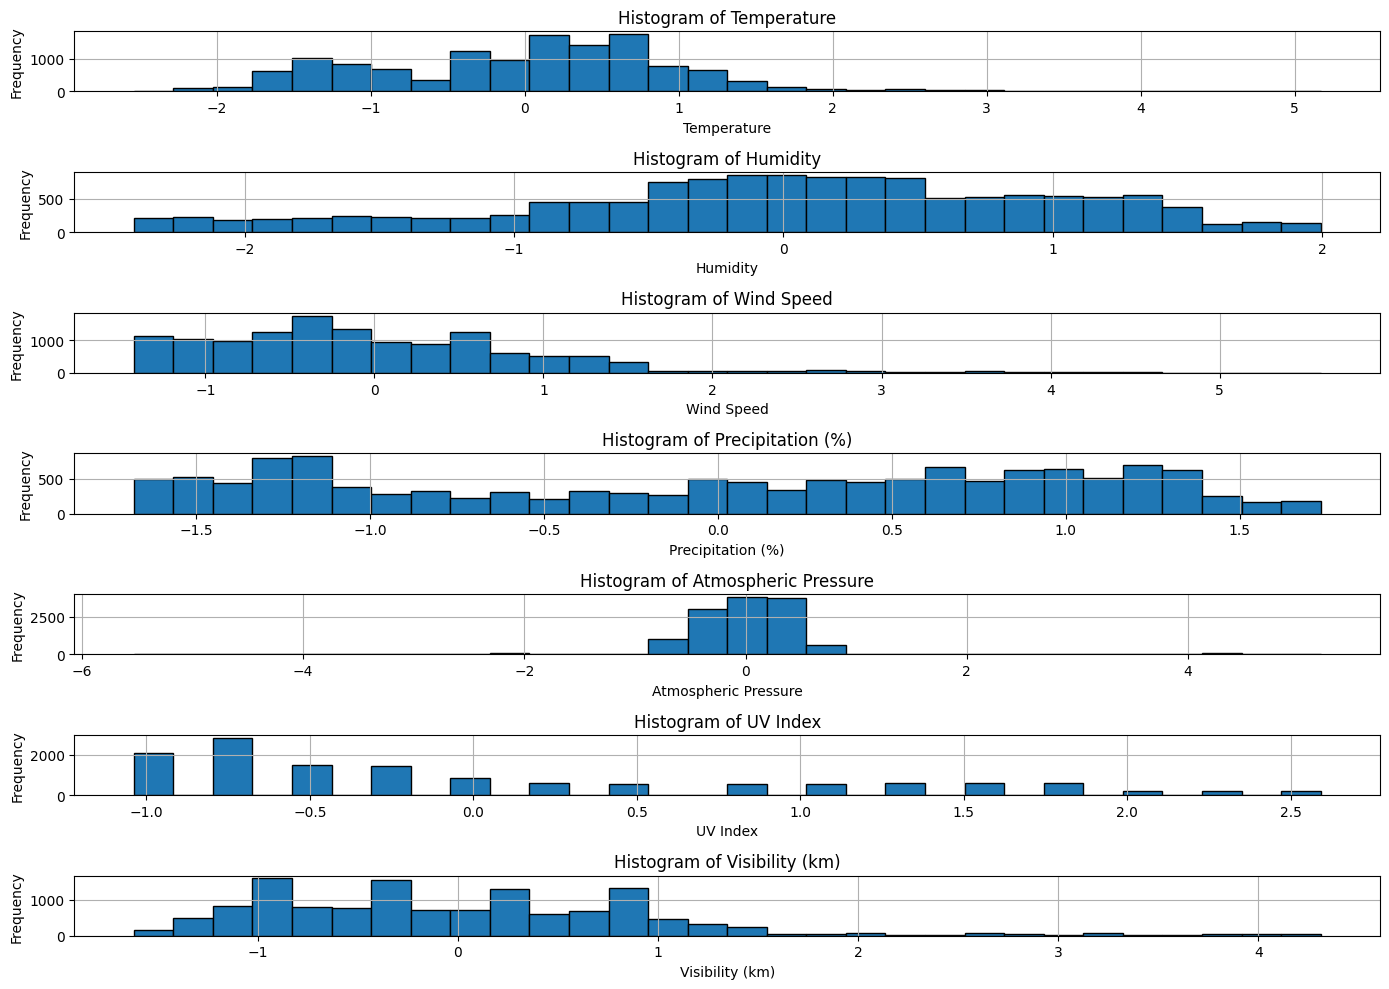

In [10]:
import matplotlib.pyplot as plt
import seaborn as sns
def plot_histograms(df):
   
    plt.figure(figsize=(14, 10))
    
    # Plot histograms for each numerical column
    for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
        plt.subplot(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, i + 1)
        df[column].hist(bins=30, edgecolor='black')
        plt.title(f'Histogram of {column}')
        plt.xlabel(column)
        plt.ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()


plot_histograms(df_encoded)


<Figure size 1400x1000 with 0 Axes>

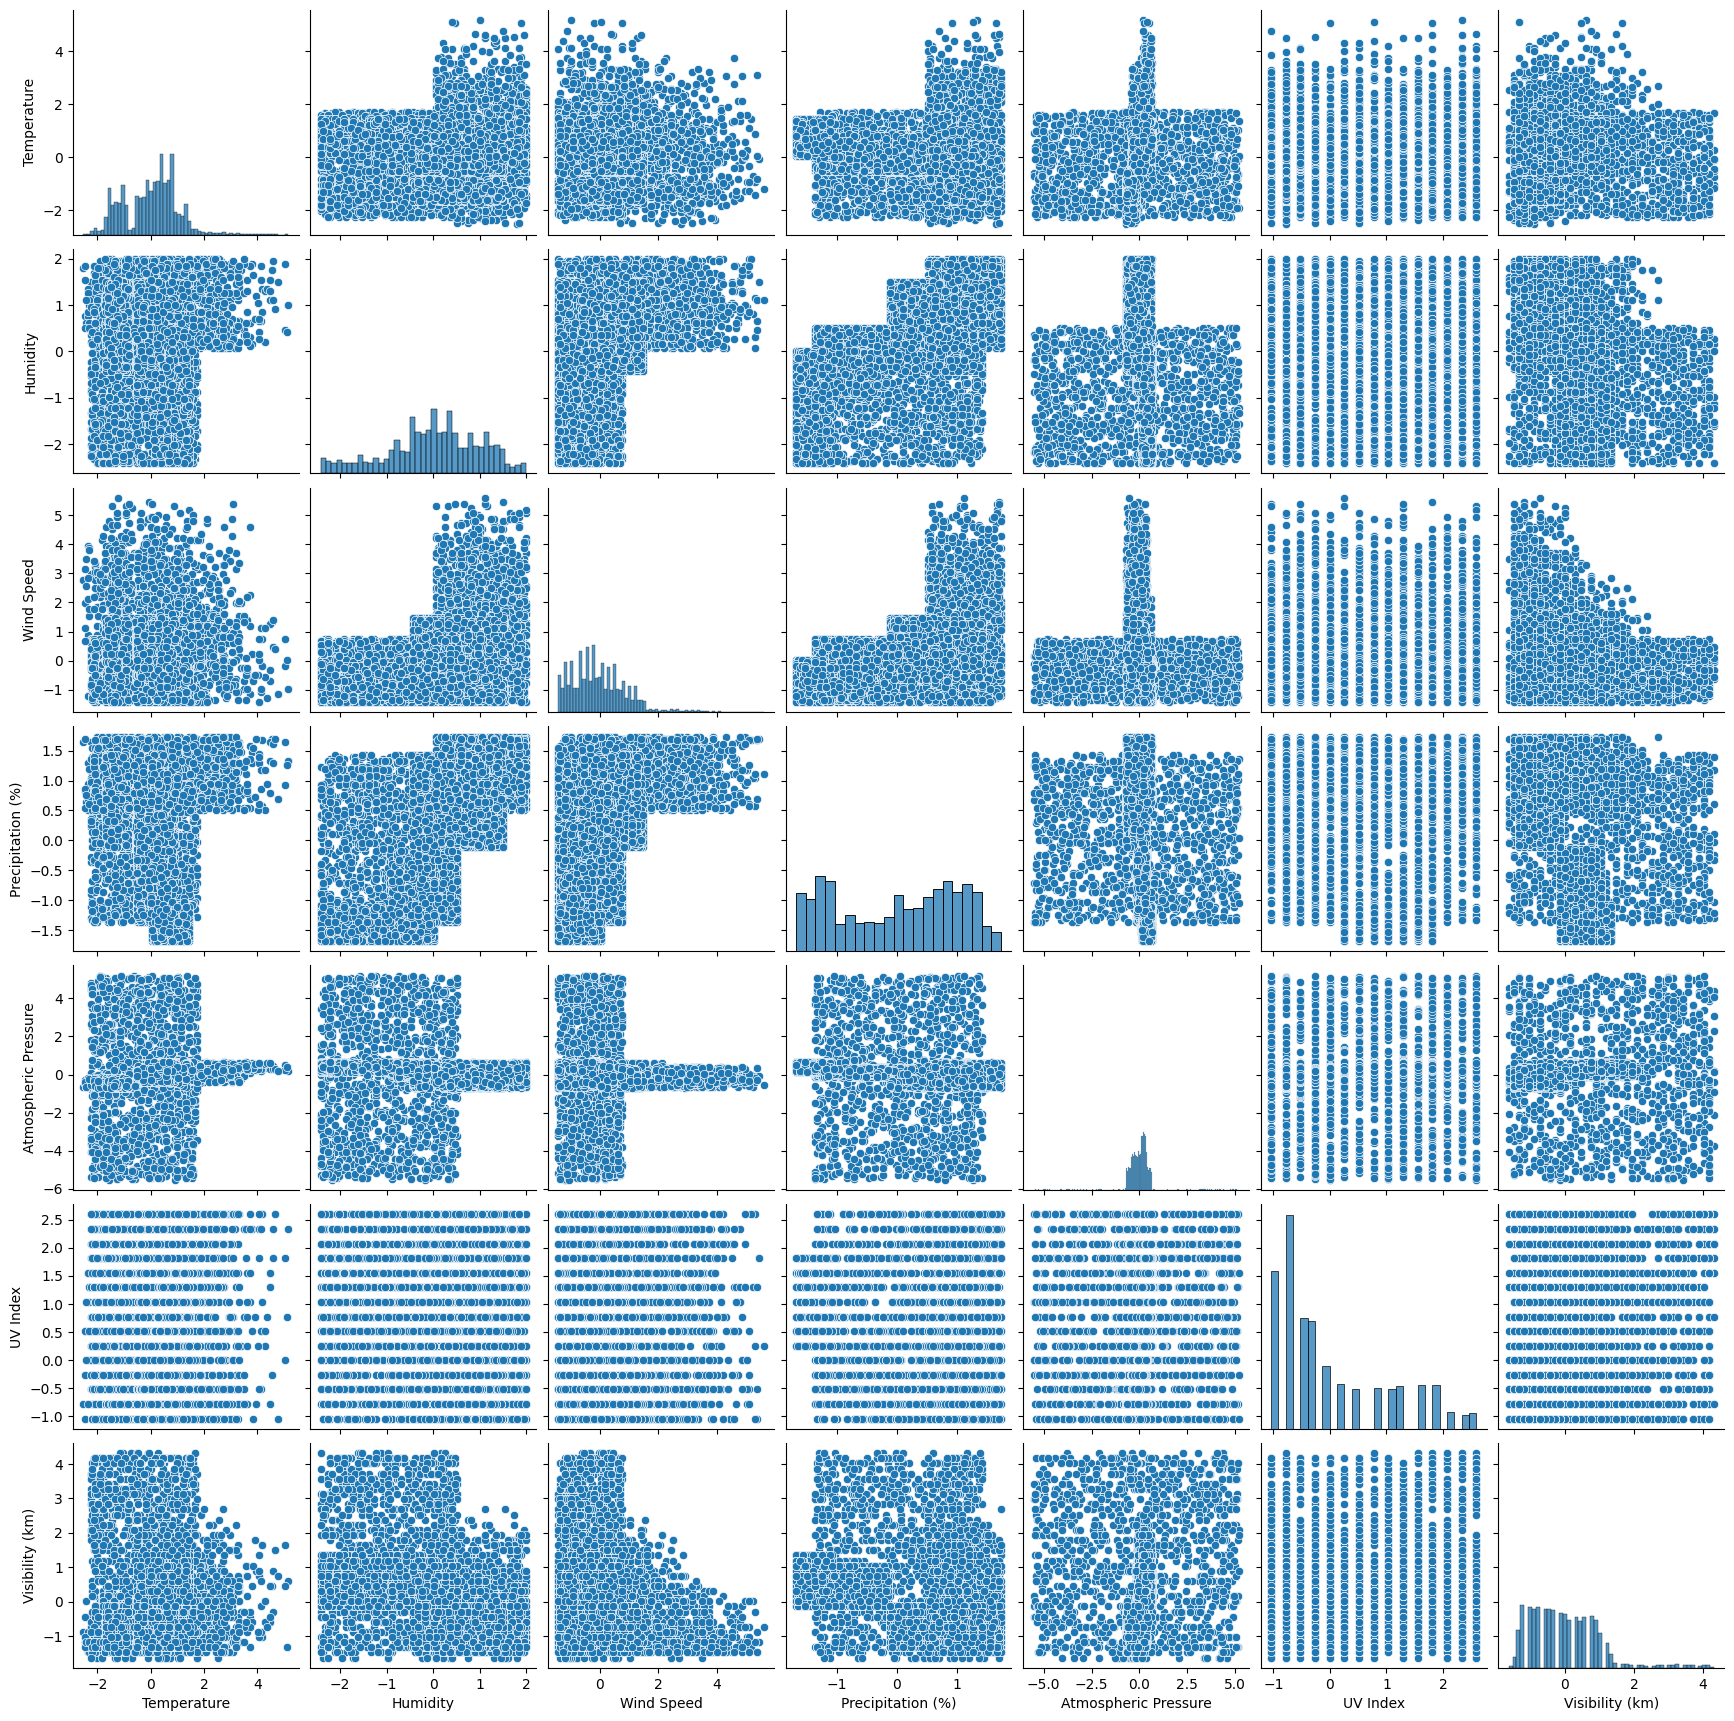

In [11]:
def plot_scatter_plots(df):
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns
    plt.figure(figsize=(14, 10))
    
    # Plot scatter plots for pairs of numerical columns
    sns.pairplot(df[numerical_cols])
    plt.show()


plot_scatter_plots(df_encoded)


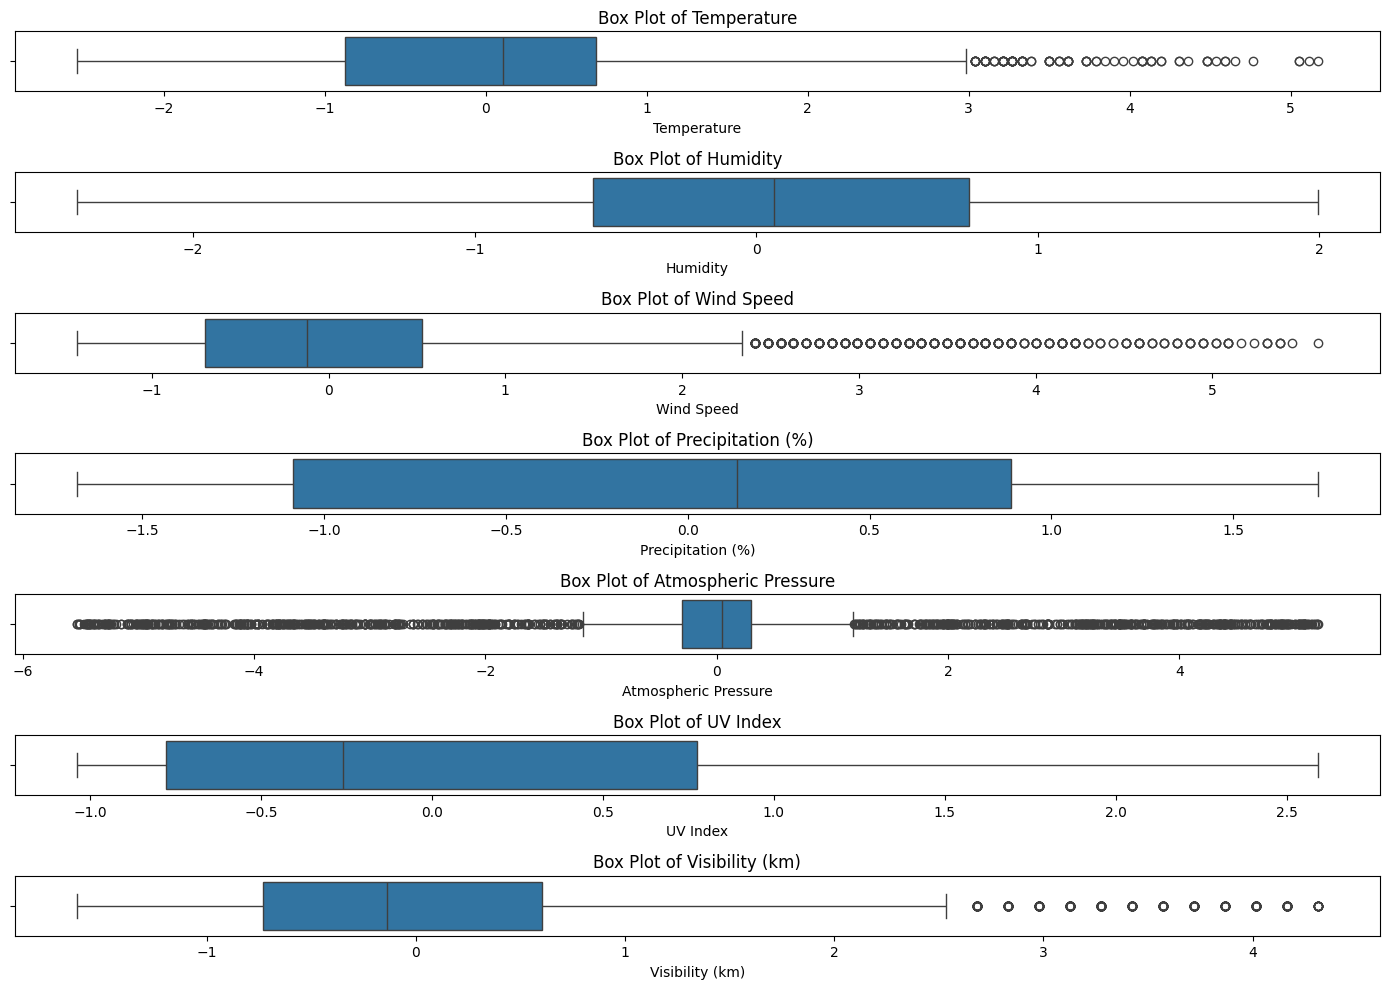

In [31]:
def plot_box_plots(df):
    plt.figure(figsize=(14, 10))
    
    # Plot box plots for each numerical column
    for i, column in enumerate(df.select_dtypes(include=['int64', 'float64']).columns):
        plt.subplot(len(df.select_dtypes(include=['int64', 'float64']).columns), 1, i + 1)
        sns.boxplot(x=df[column])
        plt.title(f'Box Plot of {column}')
    
    plt.tight_layout()
    plt.show()


plot_box_plots(df_encoded)


Splitting dataset for training and testing 

In [33]:
from sklearn.model_selection import train_test_split
x=df_encoded.drop('Weather Type',axis=1)
y=df_encoded['Weather Type']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

Applying Logistic Regression

In [50]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

log_model=LogisticRegression(max_iter=1000)
log_model.fit(x_train,y_train)
y_pred_log_reg = log_model.predict(x_test)



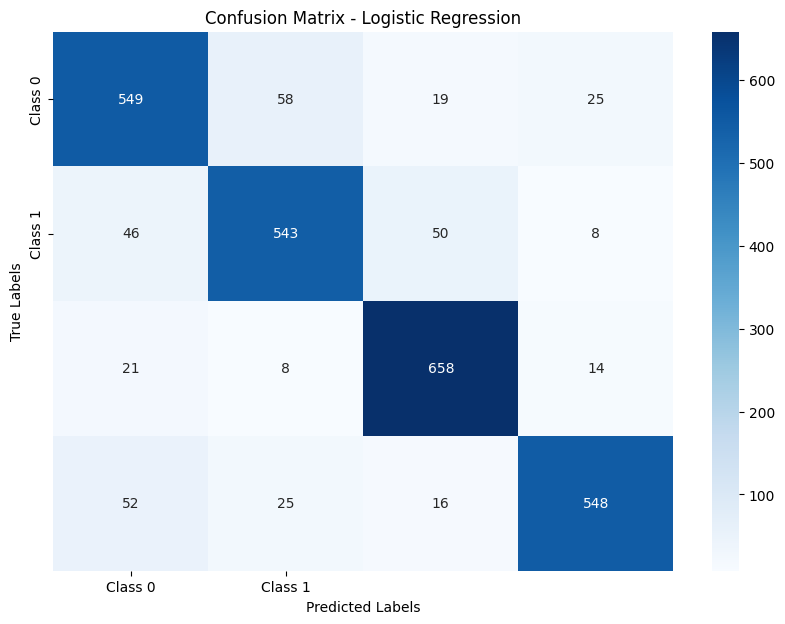

Accuracy: 0.87

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.821856  0.843318  0.832449   651.000000
Rainy          0.856467  0.839258  0.847775   647.000000
Snowy          0.885599  0.938659  0.911357   701.000000
Sunny          0.921008  0.854914  0.886731   641.000000
accuracy       0.870455  0.870455  0.870455     0.870455
macro avg      0.871233  0.869037  0.869578  2640.000000
weighted avg   0.871339  0.870455  0.870338  2640.000000


In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred_log_reg)
class_report = classification_report(y_test, y_pred_log_reg, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_log_reg)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix - Logistic Regression')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print(f"Accuracy: {accuracy:.2f}")


print("\nClassification Report:")
print(class_report_df)




Decision Tree Classifier 

In [48]:
from sklearn.tree import DecisionTreeClassifier

decision_tree = DecisionTreeClassifier(random_state=42)
decision_tree.fit(x_train, y_train)
y_pred_decision_tree = decision_tree.predict(x_test)



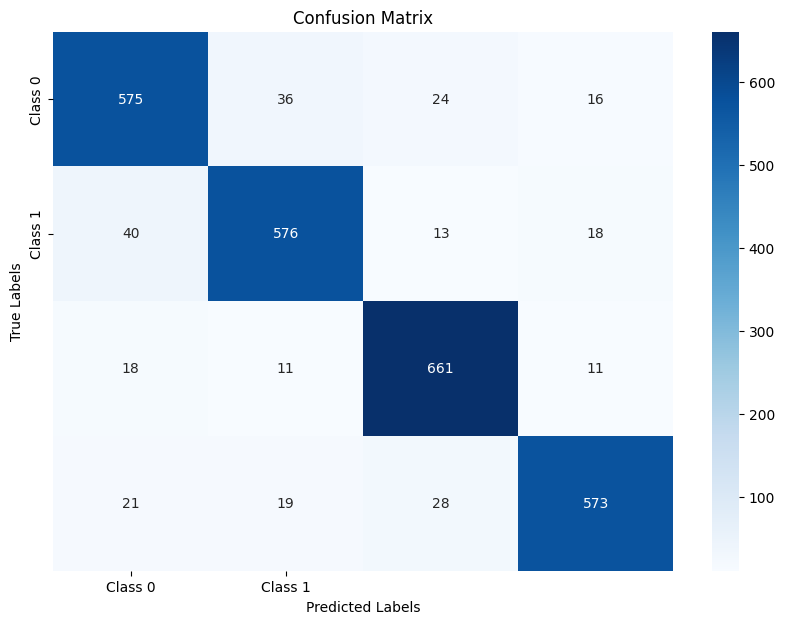

Accuracy: 0.90

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.879205  0.883257  0.881226   651.000000
Rainy          0.897196  0.890263  0.893716   647.000000
Snowy          0.910468  0.942939  0.926419   701.000000
Sunny          0.927184  0.893916  0.910246   641.000000
accuracy       0.903409  0.903409  0.903409     0.903409
macro avg      0.903513  0.902593  0.902902  2640.000000
weighted avg   0.903565  0.903409  0.903333  2640.000000


In [52]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


accuracy = accuracy_score(y_test, y_pred_decision_tree)
class_report = classification_report(y_test, y_pred_decision_tree, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_decision_tree)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()


plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()


print(f"Accuracy: {accuracy:.2f}")
print("\nClassification Report:")
print(class_report_df)




Random Forest Classifier 

In [45]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(random_state=42)
random_forest.fit(x_train, y_train)

y_pred_random_forest = random_forest.predict(x_test)




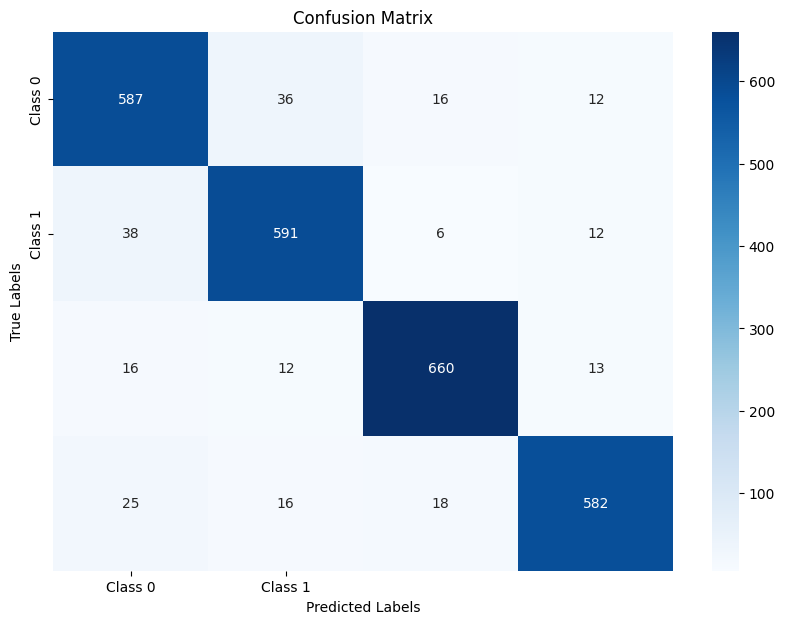

Accuracy: 0.92

Classification Report:
              precision    recall  f1-score      support
Cloudy         0.881381  0.901690  0.891420   651.000000
Rainy          0.902290  0.913447  0.907834   647.000000
Snowy          0.942857  0.941512  0.942184   701.000000
Sunny          0.940226  0.907956  0.923810   641.000000
accuracy       0.916667  0.916667  0.916667     0.916667
macro avg      0.916689  0.916151  0.916312  2640.000000
weighted avg   0.917117  0.916667  0.916786  2640.000000


In [47]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

accuracy = accuracy_score(y_test, y_pred_random_forest)
class_report = classification_report(y_test, y_pred_random_forest, output_dict=True)
conf_matrix = confusion_matrix(y_test, y_pred_random_forest)

# Convert classification report to DataFrame for better visualization
class_report_df = pd.DataFrame(class_report).transpose()

# Plot Confusion Matrix
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Class 0', 'Class 1'], yticklabels=['Class 0', 'Class 1'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

print(f"Accuracy: {accuracy:.2f}")

print("\nClassification Report:")
print(class_report_df)




### Reasons for Choosing These Models
Logistic Regression:

Simplicity: Logistic Regression is a straightforward model that is easy to implement and interpret.
Baseline: It serves as a good baseline to compare more complex models.
Decision Trees:

Interpretability: Decision Trees provide clear rules for decision-making, which can be easily interpreted.
Non-Linearity: They can capture non-linear relationships between features and the target variable.
Random Forests:

Performance: Random Forests usually perform well by aggregating predictions from multiple decision trees, reducing the risk of overfitting.
Robustness: They handle large datasets and complex interactions between features effectively.

### Models comparison:
which model is the right one to choose depends on the specicif task that what are the requirements of the task if we talk in terms of accuracy the Random Forest Classifier model gives the highest accuracy among all which leads to a good perfomace of this model as comparitive to others.